In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import csv

In [2]:
def csv_to_dict(filename):
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        data = {header: [] for header in reader.fieldnames}
        for row in reader:
            for header in reader.fieldnames:
                data[header].append(float(row[header]))
        data = {key: np.array(value) for key, value in data.items()}
    return data

In [3]:
gamma = 0.5
vlaw = 'ones'

Delta = 0.1
activation = 'ReLU'
data_uni_relu = csv_to_dict(fr'{activation}_Delta_{Delta}_gamma_{gamma}_v_{vlaw}_uni.csv')

Delta = 0.05
activation = 'ELU'
data_uni_elu = csv_to_dict(fr'{activation}_Delta_{Delta}_gamma_{gamma}_v_{vlaw}_uni.csv')


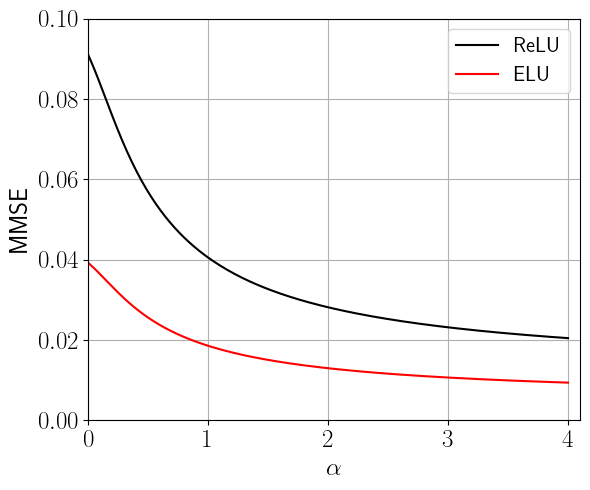

In [4]:
width, height = 6, 5
big, small = int(width*3), int(width*2.5)
fig, ax = plt.subplots(figsize=(width, height), tight_layout=True)

plt.plot(data_uni_relu['alpha'], data_uni_relu['mmse'], label='ReLU', color='black')
plt.plot(data_uni_elu['alpha'], data_uni_elu['mmse'], label='ELU', color='red')

ax.tick_params(axis='both', labelsize=big)
plt.xlabel(r'$\alpha$', fontsize=big)
plt.ylabel('MMSE', fontsize=big)
plt.legend(fontsize=small)
plt.xlim(0, 4.1)
plt.ylim(0, 0.1)
plt.grid(True)

plt.show()